# Advanced Deep Learning for Physics Exercise 1: Introduction to $\Phi_{Flow}$

## 1. Tensors Representing Physical Data

In [1]:
from phi.torch.flow import*
import matplotlib.pyplot as plt

##### 1.1: Representing a Single Point


<Figure size 500x500 with 1 Axes>

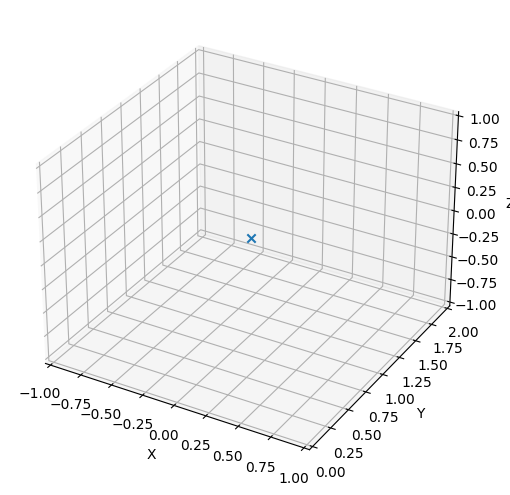

In [96]:
v1 = vec(x=0, y=1, z=0)
plot(v1, size=(5,5))

##### 1.2: Representing Linearly Spaced Points


(-0.25, 1.25)

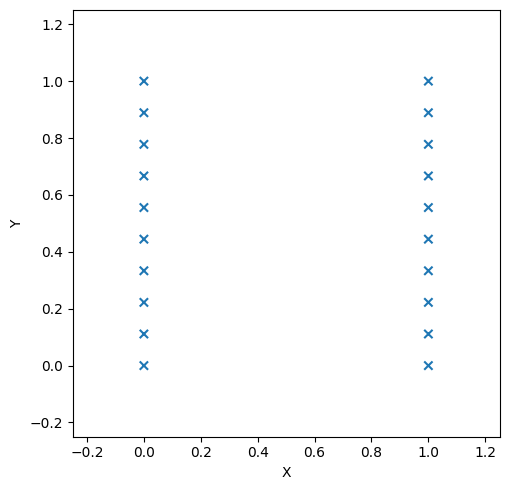

In [6]:
points = concat([vec(x = 0, y = math.linspace(0, 1, instance(points = 10))),
            vec(x = 1, y = math.linspace(0, 1, instance(points = 10)))], 'points')
plot(points)
plt.xlim(left = -.25, right = 1.25)
plt.ylim(bottom = -.25, top = 1.25)

##### 1.3: Time Dependent Signal Consisting of 100 Samples


<Figure size 1200x500 with 1 Axes>

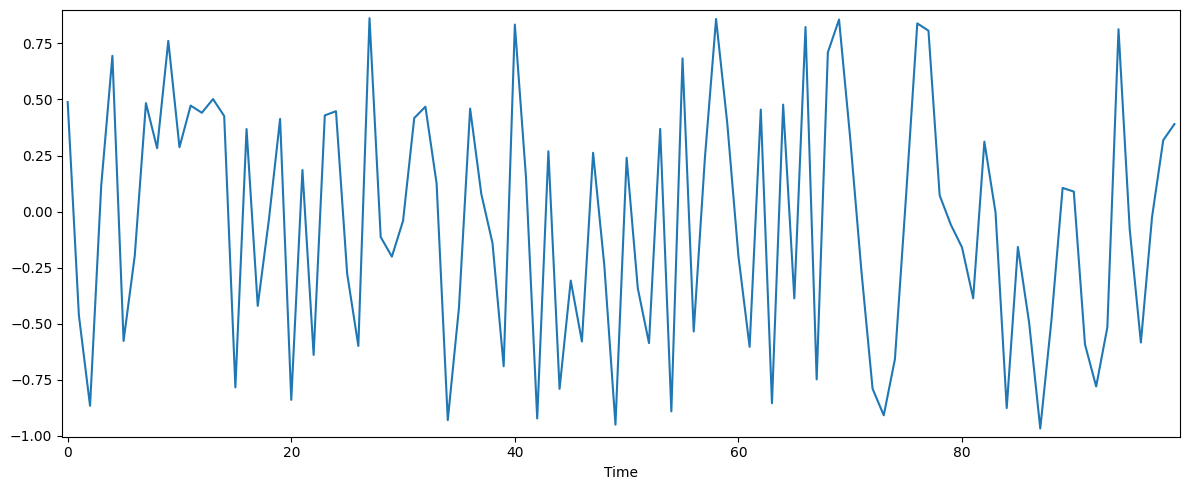

In [98]:
t1 = math.random_uniform(spatial(time=100), low = -1, high = 1)
plot(t1)

##### 1.4: Three Time Dependent Signals Consisting of 100 Samples


<Figure size 1200x500 with 1 Axes>

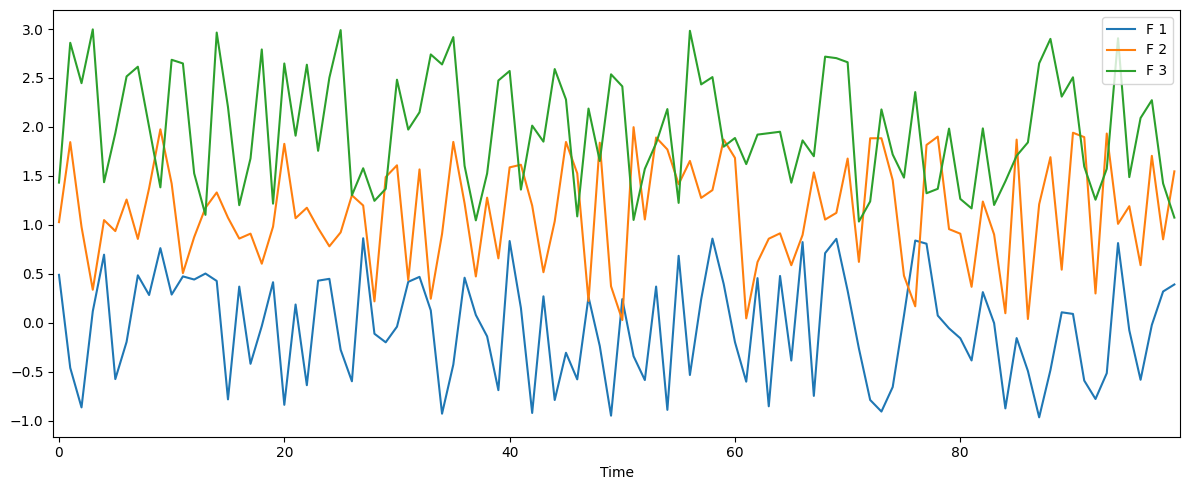

In [99]:
x = stack({ 
    'f_1': t1,
    'f_2': math.random_uniform(spatial(time=100), low = 0, high = 2),
    'f_3':  math.random_uniform(spatial(time=100), low = 1, high = 3)
}, channel('spatial'))
plot(x)

##### 1.5: A Two-Dimensional Scalar 10x10 Grid


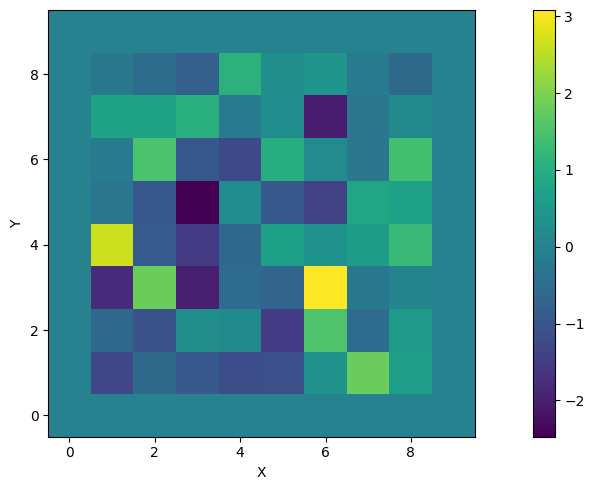

In [100]:
p1 = plot(math.pad(math.random_normal(spatial(x=8, y=8)), {'x': (1, 1), 'y': (1, 1)}, 0))

##### 1.6: Three Two-Dimensional Scalar 10x10 Grids


<Figure size 1200x500 with 4 Axes>

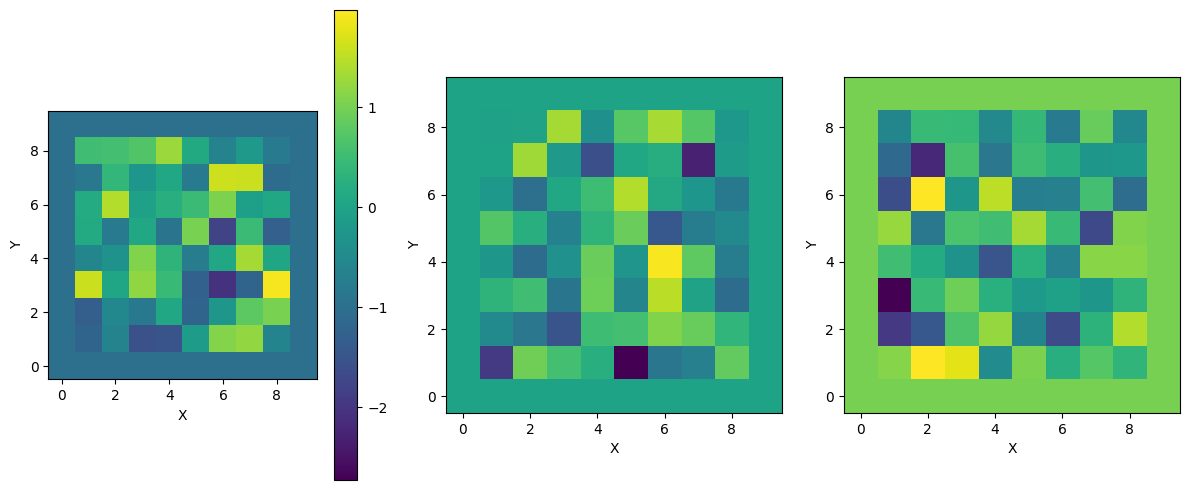

In [10]:
plot(math.pad(math.random_normal(spatial(x=8, y=8)), {'x': (1, 1), 'y': (1, 1)}, -1),
     math.pad(math.random_normal(spatial(x=8, y=8)), {'x': (1, 1), 'y': (1, 1)}, 0),
     math.pad(math.random_normal(spatial(x=8, y=8)), {'x': (1, 1), 'y': (1, 1)}, 1))

##### 2: Bouncing Balls Simulation


<Figure size 1200x500 with 1 Axes>

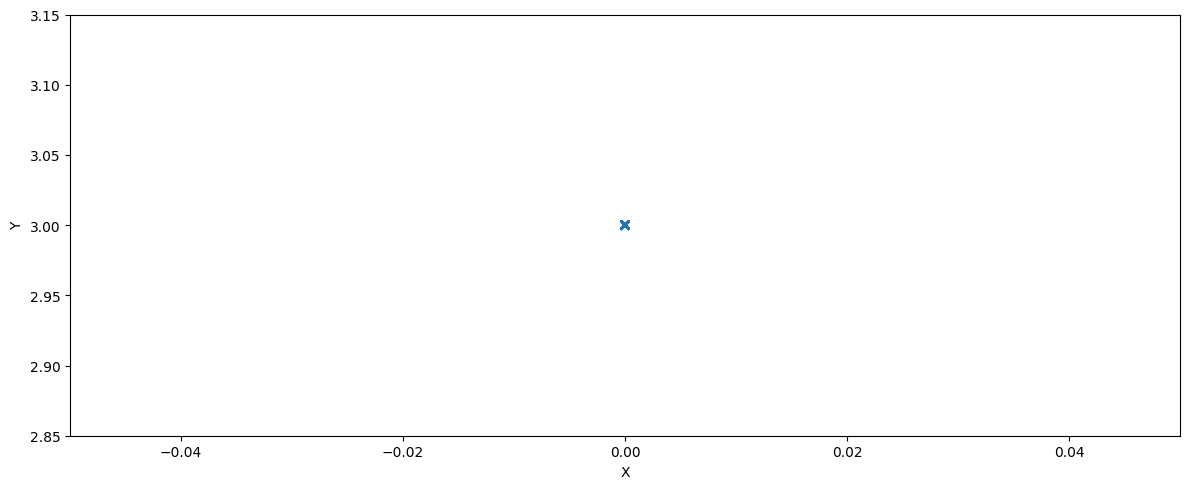

In [12]:
# 10 Balls located at x = 0, y = 1
x0 = vec(x = math.zeros(instance(balss = 10)), y = 3 * math.ones(instance(balls = 10)))
plot(x0)

<Figure size 1200x500 with 1 Axes>

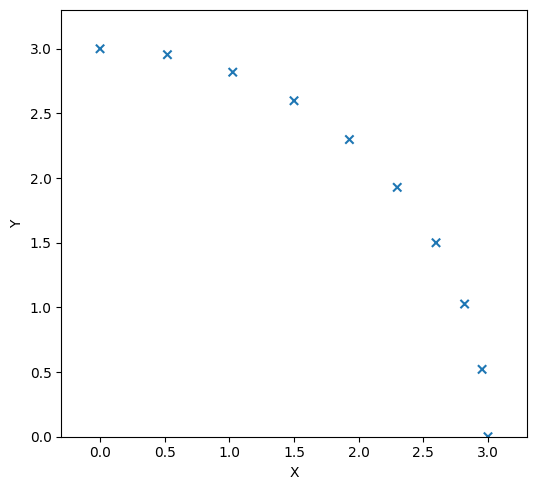

In [13]:
# All balls have initial speed of 3
# their angle of attacks linearly spaced between x & y 
v0 = vec(
    x = 3 * math.cos(math.linspace(0, PI / 2, instance(balls = 10))),
    y = 3 * math.sin(math.linspace(0, PI / 2, instance(balls = 10))))
plot(v0)

<Figure size 1200x500 with 1 Axes>

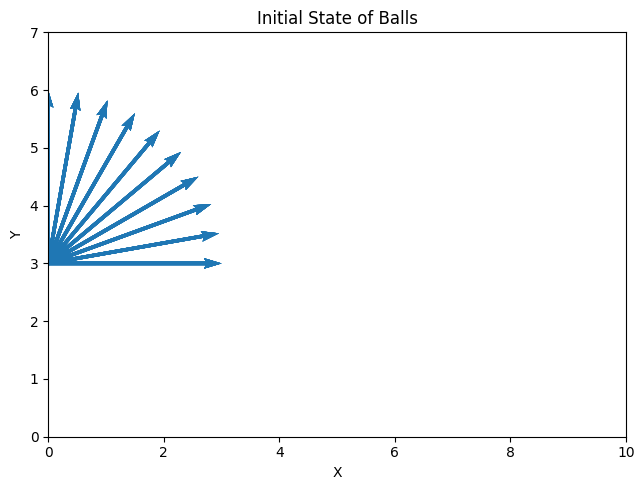

In [17]:
# store location & velocity on the same object 
balls = PointCloud(Sphere(x0, radius=.1), v0, bounds=Box( x = 10, y = 7))
plot(balls, title='Initial State of Balls')

In [18]:
# air_friction = 0.7
# gravity = 9.81
# dt = 0.1
air_friction = 0.7
gravity = 9.81

# simulation function
def step(balls, dt=.1):
  balls *= math.where(balls.points.vector['y'] < 0, (1, -1), 1) * air_friction ** dt
  return advect.points(balls, balls, dt) + (0, -gravity * dt)

In [23]:
# iterate 10s 
motion =  iterate(step, batch(t=100), balls)

# animation of result
#plot(field.mask(res), animate='t')

<Figure size 1200x500 with 5 Axes>

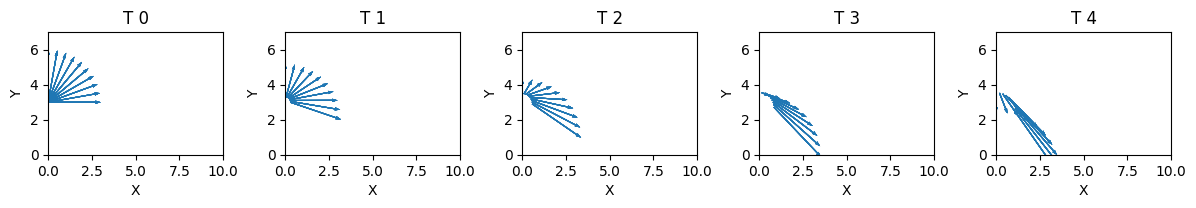

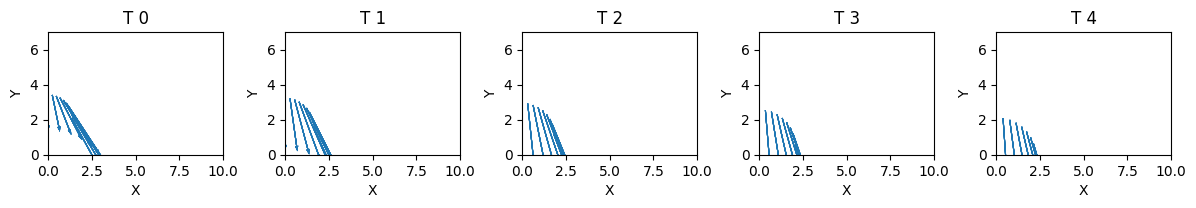

In [41]:
# plot some represantative results
t1 = motion.t[0:5]
t2 = motion.t[5:10]
t3 = motion.t[91:96]
t4 = motion.t[-5:]
plot(t1)
plot(t2)


<Figure size 1200x500 with 5 Axes>

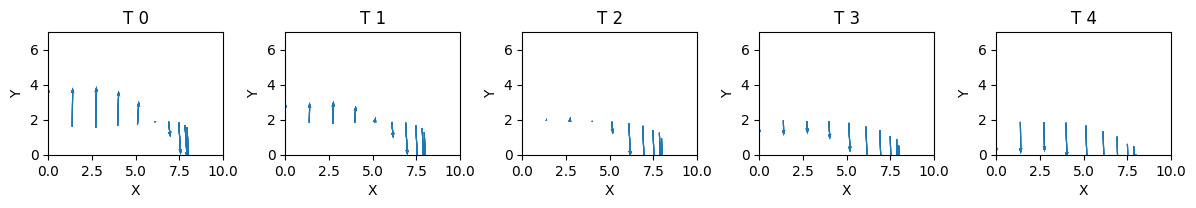

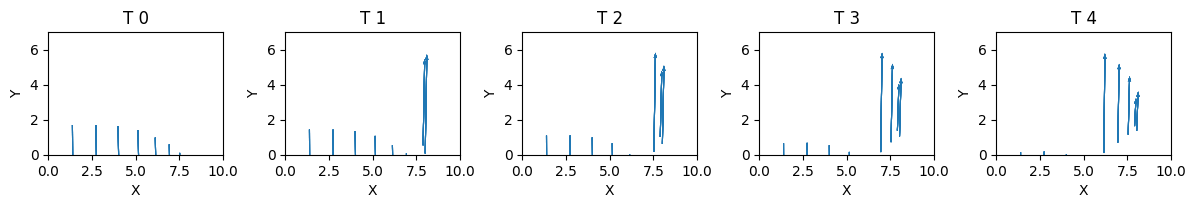

In [42]:
plot(t3)
plot(t4)